In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
donations_file_path = os.getcwd() + '/io/Donations.csv'
projects_file_path = os.getcwd() + '/io/Projects.csv'
donors_file_path = os.getcwd() + '/io/Donors.csv'
chunk_size=10**6
donations_table = pd.read_csv(donations_file_path,sep=',',header=0,keep_default_na=True,chunksize=chunk_size)
projects_table = pd.read_csv(projects_file_path,sep=',',header=0,keep_default_na=True,chunksize=chunk_size)
donors_table = pd.read_csv(donors_file_path,sep=',',header=0,keep_default_na=True,chunksize=chunk_size)

In [3]:
# del donations_table
for chunck in projects_table:
    projects_head_chunck = chunck
    break
for chunck in donations_table:
    donations_head_chunck = chunck
    break
for chunck in donors_table:
    donors_head_chunck = chunck
    break
# print(projects_head_chunck.iloc[0])
# print(donations_head_chunck.iloc[0])
# print(donors_head_chunck.iloc[0])

Project ID                                           7685f0265a19d7b52a470ee4bac883ba
School ID                                            e180c7424cb9c68cb49f141b092a988f
Teacher ID                                           4ee5200e89d9e2998ec8baad8a3c5968
Teacher Project Posted Sequence                                                    25
Project Type                                                              Teacher-Led
Project Title                                  Stand Up to Bullying: Together We Can!
Project Essay                       Did you know that 1-7 students in grades K-12 ...
Project Short Description           Did you know that 1-7 students in grades K-12 ...
Project Need Statement              My students need 25 copies of "Bullying in Sch...
Project Subject Category Tree                                        Applied Learning
Project Subject Subcategory Tree               Character Education, Early Development
Project Grade Level Category                          

In [4]:
#assign series ID to new columns in projects_head_chunck
f=len(projects_head_chunck)
g=list(range(1,f+1))
projects_head_chunck['project_id']=np.NaN
g=pd.Series(g)
projects_head_chunck['project_id']=g.values

In [5]:
merged_donations_table_piece = donations_head_chunck.merge(projects_head_chunck,on="Project ID",how="inner")
merged_donations_table_piece = merged_donations_table_piece.drop(["Project ID"],axis=1)
colsList = list(merged_donations_table_piece)
# print(colsList)
colsList.insert(0,colsList.pop(-1))
# print(colsList)
# colsList[0],colsList[-1] = colsList[-1],colsList[0]
merged_donations_table_piece=merged_donations_table_piece.reindex(columns=colsList)
merged_donations_table_piece = merged_donations_table_piece.merge(donors_head_chunck,on="Donor ID",how="inner")
print(merged_donations_table_piece.shape)
# print(merged_donations_table_piece.columns)

(440520, 28)
Index([u'project_id', u'Donation ID', u'Donor ID',
       u'Donation Included Optional Donation', u'Donation Amount',
       u'Donor Cart Sequence', u'Donation Received Date', u'School ID',
       u'Teacher ID', u'Teacher Project Posted Sequence', u'Project Type',
       u'Project Title', u'Project Essay', u'Project Short Description',
       u'Project Need Statement', u'Project Subject Category Tree',
       u'Project Subject Subcategory Tree', u'Project Grade Level Category',
       u'Project Resource Category', u'Project Cost', u'Project Posted Date',
       u'Project Expiration Date', u'Project Current Status',
       u'Project Fully Funded Date', u'Donor City', u'Donor State',
       u'Donor Is Teacher', u'Donor Zip'],
      dtype='object')


In [21]:
donation_id=merged_donations_table_piece['Donation ID']
donor_id=merged_donations_table_piece['Donor ID']
project_id=merged_donations_table_piece['project_id']
print(donation_id.unique())
print(donor_id.is_unique)
print(project_id.is_unique)


['688729120858666221208529ee3fc18e' 'f7fc7cf0b8980fb00840b4afe7c1e761'
 '5015b2df023ed47e7609e91ca65f7559' ... '19e59ca236309305dd01a8e1ebf5777a'
 '23f7d12fa06cfc12885f67eb66a380ba' 'aeefb374cb05513d8d9f7ea4c1449cbc']
False
False


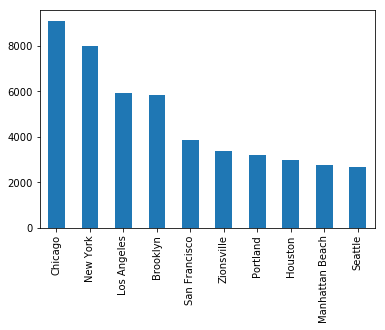

In [12]:
donor_city_counts=merged_donations_table_piece['Donor City'].value_counts()
donor_city_counts_head=donor_city_counts[:10]
donor_city_counts_head.plot(kind='bar')

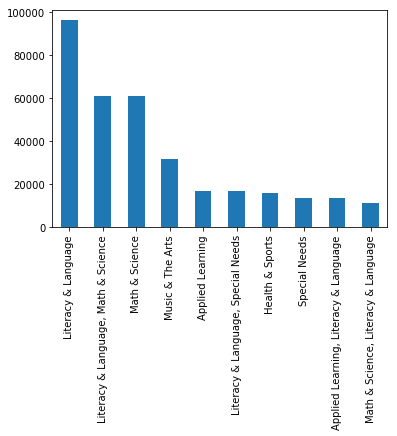

In [15]:
merged_donations_table_piece['Project Subject Category Tree'].value_counts()[:10].plot(kind='bar')

In [16]:
merged_donations_table_piece.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            440510, 440511, 440512, 440513, 440514, 440515, 440516, 440517,
            440518, 440519],
           dtype='int64', length=440520)

In [20]:
merged_donations_table_piece.groupby('Donor City').aggregate(sum)

,project_id,Donation Amount,Donor Cart Sequence,Teacher Project Posted Sequence,Project Cost
Donor City,,,,,
Abbeville,29166923,4208.42,222,285,44363.66
Abbott,541100,255.00,1,1,574.96
Abbottstown,145963,25.00,1,2,582.14
Abercrombie,1539580,1075.00,6,8,3974.26
Aberdeen,25908282,3039.66,86,254,43448.47
Aberdeen Proving Ground,247993,50.00,1,1,567.07
Abilene,122545113,2856.51,21838,7301,85165.92
Abingdon,17724871,2384.53,81,133,31745.20
Abington,62683855,2845.52,3632,2122,57972.28
